# Assignment: Trees
Do three questions.

**Q1.** Please answer the following questions in your own words.

1. How are trees constructed?

2. How do trees handle non-linear relationships between variables? Compare this to linear models.

3. Why is the Gini a good loss function for categorical target variables?

4. Why do trees tend to overfit, and how can this tendency be constrained?

5. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates.

6. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?

7. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?

**Q2.** This is a case study on regression and classification trees.

1. Load `./data/cars_hw.csv`. How many observations and features/covariates/variables? What are the available variables? Take a look at the first few rows of data.

2. For the categorical variables `Make`, `Color`, `Body_type`, `No_of_Owners`, `Fuel_Type`, `Transmission`, and `Transmission_Type`, create dummy/one-hot-encoded representations. For numeric variables, we'll use `Mileage_Run`, `Make_Year`, and `Seating_Capacity`. Our target variable will be `Price`. Make a train-test split of your data.

3. From `sklearn.tree`, import the `DecisionTreeRegressor` and `plot_tree`. Use a train-test split to iterate over possible values for `min_samples_leaf`, computing the $R^2$ for each value between 1 and 25. What choice achieves the highest $R^2$ on the test data?

4. For the optimal `min_samples_leaf` from 3, regress price on the rest of the features/covariates using the training data. What is your $R^2$ and RMSE on the test set? Plot the dendrogram. Plot the residuals. Is the density of residuals symmetric and centered around 0?

4. Run a linear regression of price on the same variables. Which model -- regression tree or linear regression -- performs better on the test set? Why?

5. Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# df = pd.read_csv('./data/cars_hw.csv')
df = pd.read_csv('cars_hw.csv')

print("Observations:", df.shape[0])
print("Features:", df.shape[1])
print("Variables:", df.columns.tolist())
print(df.head())

Observations: 976
Features: 12
Variables: ['Unnamed: 0', 'Make', 'Make_Year', 'Color', 'Body_Type', 'Mileage_Run', 'No_of_Owners', 'Seating_Capacity', 'Fuel_Type', 'Transmission', 'Transmission_Type', 'Price']
   Unnamed: 0        Make  Make_Year   Color  Body_Type  Mileage_Run  \
0           1  Volkswagen       2017  silver      sedan        44611   
1           2     Hyundai       2016     red  crossover        20305   
2           3       Honda       2019   white        suv        29540   
3           4     Renault       2017  bronze  hatchback        35680   
4           5     Hyundai       2017  orange  hatchback        25126   

  No_of_Owners  Seating_Capacity Fuel_Type Transmission Transmission_Type  \
0          1st                 5    diesel      7-Speed         Automatic   
1          1st                 5    petrol      5-Speed            Manual   
2          2nd                 5    petrol      5-Speed            Manual   
3          1st                 5    petrol      5

In [2]:
from sklearn.model_selection import train_test_split

categoricals = ['Make', 'Color', 'Body_Type', 'No_of_Owners', 'Fuel_Type', 'Transmission', 'Transmission_Type']
df_encoded = pd.get_dummies(df, columns=categoricals, drop_first=True)

X = df_encoded.drop(columns=['Price'])
y = df_encoded['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

def rmse(y_true, y_pred):
  return np.sqrt(np.mean((y_true - y_pred)**2))

def r2(y_true, y_pred):
  tss = np.sum((y_true - np.mean(y_true))**2)
  rss = np.sum((y_true - y_pred)**2)
  return 1 - (rss / tss)

for leaf in range(1, 26):
    model = DecisionTreeRegressor(min_samples_leaf=leaf, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2_value = r2(y_test, y_pred)
    print(f"leaf: {leaf}, r2: {r2_value}")

leaf: 1, r2: 0.818581675791736
leaf: 2, r2: 0.7857264218496814
leaf: 3, r2: 0.7926958550870222
leaf: 4, r2: 0.8124119272741501
leaf: 5, r2: 0.821189900976671
leaf: 6, r2: 0.811535669884336
leaf: 7, r2: 0.8156462903807882
leaf: 8, r2: 0.8213135837522154
leaf: 9, r2: 0.8142922654247499
leaf: 10, r2: 0.7962588249076352
leaf: 11, r2: 0.7985444679973868
leaf: 12, r2: 0.7894599440471963
leaf: 13, r2: 0.792222581161176
leaf: 14, r2: 0.7890244437850957
leaf: 15, r2: 0.786715174278277
leaf: 16, r2: 0.7732901463599883
leaf: 17, r2: 0.7757313248171239
leaf: 18, r2: 0.7730150779208569
leaf: 19, r2: 0.7505923273241424
leaf: 20, r2: 0.7494342334305945
leaf: 21, r2: 0.7472005202145116
leaf: 22, r2: 0.7506166311076276
leaf: 23, r2: 0.7347284641013797
leaf: 24, r2: 0.7281259917823085
leaf: 25, r2: 0.7213135172380893


Leaf = 8 achieves the highest R^2 of 0.82.

R^2: 0.8213135837522154, RMSE: 143159.08892903704


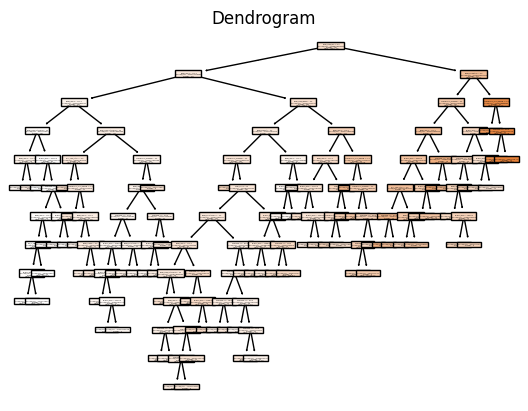

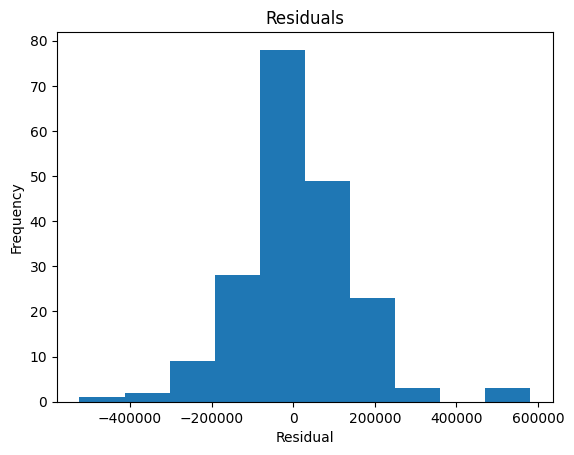

In [4]:
tree_model = DecisionTreeRegressor(min_samples_leaf=8, random_state=42)
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)

r2_value = r2(y_test, y_pred)
rmse_value = rmse(y_test, y_pred)
print(f"R^2: {r2_value}, RMSE: {rmse_value}")

plot_tree(tree_model, filled=True, feature_names=X.columns)
plt.title("Dendrogram")
plt.show()

residuals = y_test - y_pred
plt.hist(residuals)
plt.title("Residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()


Yes, the density of residuals is roughly symmetric and centered around 0.

In [5]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_lin_pred = lin_model.predict(X_test)

r2_lin = r2(y_test, y_lin_pred)
rmse_lin = rmse(y_test, y_lin_pred)
print(f"R^2: {r2_lin}, RMSE: {rmse_lin}")


R^2: 0.8163910583949119, RMSE: 145117.59426198687


The regression tree performs slightly better on the test set because the R^2 is slightly higher and rmse slightly lower than the linear regression.

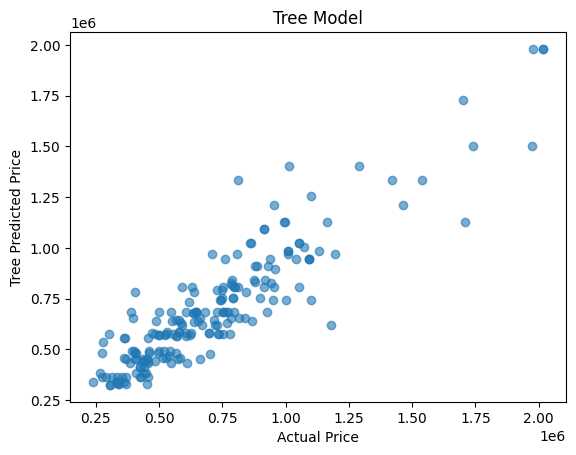

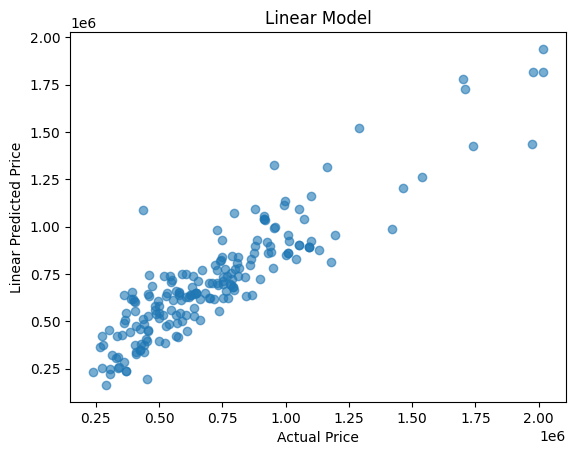

In [6]:
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Price")
plt.ylabel("Tree Predicted Price")
plt.title("Tree Model")
plt.show()

plt.scatter(y_test, y_lin_pred, alpha=0.6)
plt.xlabel("Actual Price")
plt.ylabel("Linear Predicted Price")
plt.title("Linear Model")
plt.show()

Both models have very similar predictions and follow the diagonal very closely. This means both models performed well on the test set.

**Q3.** This is a case study about classification and regression trees.

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.

3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy?

4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?

5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

In [7]:
df = pd.read_csv("Breast Cancer METABRIC.csv")

print("Observations:", df.shape[0])
print("Features:", df.shape[1])
print("Variables:", df.columns.tolist())
print(df.head())

Observations: 2509
Features: 34
Variables: ['Patient ID', 'Age at Diagnosis', 'Type of Breast Surgery', 'Cancer Type', 'Cancer Type Detailed', 'Cellularity', 'Chemotherapy', 'Pam50 + Claudin-low subtype', 'Cohort', 'ER status measured by IHC', 'ER Status', 'Neoplasm Histologic Grade', 'HER2 status measured by SNP6', 'HER2 Status', 'Tumor Other Histologic Subtype', 'Hormone Therapy', 'Inferred Menopausal State', 'Integrative Cluster', 'Primary Tumor Laterality', 'Lymph nodes examined positive', 'Mutation Count', 'Nottingham prognostic index', 'Oncotree Code', 'Overall Survival (Months)', 'Overall Survival Status', 'PR Status', 'Radio Therapy', 'Relapse Free Status (Months)', 'Relapse Free Status', 'Sex', '3-Gene classifier subtype', 'Tumor Size', 'Tumor Stage', "Patient's Vital Status"]
  Patient ID  Age at Diagnosis Type of Breast Surgery    Cancer Type  \
0    MB-0000             75.65             Mastectomy  Breast Cancer   
1    MB-0002             43.19      Breast Conserving  Brea

In [8]:
numeric_vars = ['Tumor Size', 'Lymph nodes examined positive', 'Age at Diagnosis']
categorical_vars = ['Tumor Stage', 'Chemotherapy', 'Cancer Type Detailed']

df_encoded = pd.get_dummies(df[categorical_vars], drop_first=True)
X = pd.concat([df[numeric_vars], df_encoded], axis=1)

print(X.head())

   Tumor Size  Lymph nodes examined positive  Age at Diagnosis  Tumor Stage  \
0        22.0                           10.0             75.65          2.0   
1        10.0                            0.0             43.19          1.0   
2        15.0                            1.0             48.87          2.0   
3        25.0                            3.0             47.68          2.0   
4        40.0                            8.0             76.97          2.0   

   Chemotherapy_Yes  Cancer Type Detailed_Breast Angiosarcoma  \
0             False                                     False   
1             False                                     False   
2              True                                     False   
3              True                                     False   
4              True                                     False   

   Cancer Type Detailed_Breast Invasive Ductal Carcinoma  \
0                                               True       
1             

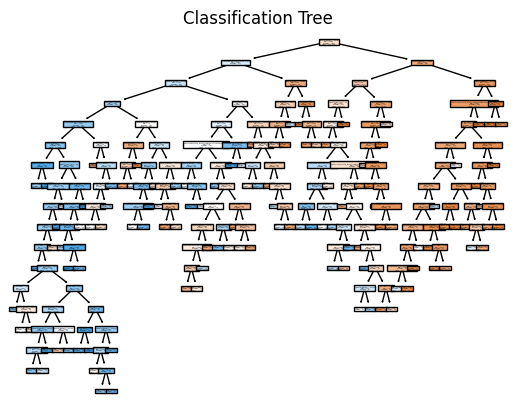

Confusion Matrix:
 col_0                    Deceased  Living
Overall Survival Status                  
Deceased                      163      70
Living                         89      75
Accuracy:  0.5994962216624685


In [9]:
from sklearn.tree import DecisionTreeClassifier

df_clean = df.dropna(subset=['Overall Survival Status'])

y = df_clean['Overall Survival Status']
X_clean = X.loc[df_clean.index]

X_train, X_test, y_train, y_test = train_test_split(X_clean, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(min_samples_leaf=10, random_state=42)
clf.fit(X_train, y_train)

plot_tree(clf, feature_names=X.columns, filled=True)
plt.title("Classification Tree")
plt.show()

y_pred = clf.predict(X_test)
tab = pd.crosstab(y_test,y_pred)
print("Confusion Matrix:\n", tab)
acc = (tab.iloc[0,0]+tab.iloc[1,1])/len(y_test)
print("Accuracy: ", str(acc))

In [10]:
TN, FP, FN, TP = tab.iloc[0,0], tab.iloc[0,1], tab.iloc[1,0], tab.iloc[1,1]

TPR = TP / (TP + FN)
TNR = TN / (TN + FP)

print(f"True Positive Rate: {TPR}")
print(f"True Negative Rate: {TNR}")

True Positive Rate: 0.4573170731707317
True Negative Rate: 0.6995708154506438


The model performs better with true negative rate.

In [11]:
df_reg = df.dropna(subset=['Overall Survival (Months)'])
y_reg = df_reg['Overall Survival (Months)']
X_reg = X.loc[df_reg.index]

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

for leaf in range(105, 116):
    model = DecisionTreeRegressor(min_samples_leaf=leaf, random_state=42)
    model.fit(X_train_r, y_train_r)
    y_pred_r = model.predict(X_test_r)

    r2_value = r2(y_test_r, y_pred_r)
    print(f"leaf: {leaf}, r2: {r2_value}")

leaf: 105, r2: 0.1230644768290382
leaf: 106, r2: 0.12553307260747004
leaf: 107, r2: 0.12510851324203043
leaf: 108, r2: 0.12434618007888432
leaf: 109, r2: 0.12531862350063172
leaf: 110, r2: 0.12530611009734527
leaf: 111, r2: 0.12527884425639424
leaf: 112, r2: 0.12529509538006933
leaf: 113, r2: 0.1221205249399665
leaf: 114, r2: 0.12194632652434789
leaf: 115, r2: 0.12179897772547066


Leaf = 106 gives the highest R^2 = 0.126.

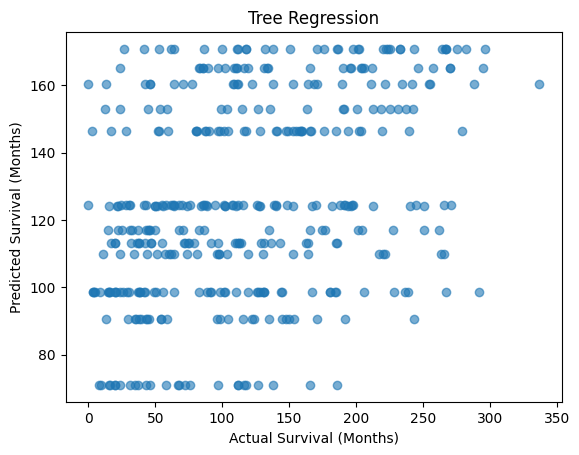

In [12]:
final_model = DecisionTreeRegressor(min_samples_leaf=106, random_state=42)
final_model.fit(X_train_r, y_train_r)
y_pred_final = final_model.predict(X_test_r)

plt.scatter(y_test_r, y_pred_final, alpha=0.6)
plt.xlabel("Actual Survival (Months)")
plt.ylabel("Predicted Survival (Months)")
plt.title("Tree Regression")
plt.show()


I think this model isn't good for clinical purposes because the R^2 is very low, which means the model doesn't really explain the variance in predictions.

**Q4.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$.

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

In [19]:
df = pd.read_csv("corporate_ratings.csv")

print("Observations:", df.shape[0])
print("Features:", df.shape[1])
print("Variables:", df.columns.tolist())
print(df.head())

Observations: 2029
Features: 31
Variables: ['Rating', 'Name', 'Symbol', 'Rating Agency Name', 'Date', 'Sector', 'currentRatio', 'quickRatio', 'cashRatio', 'daysOfSalesOutstanding', 'netProfitMargin', 'pretaxProfitMargin', 'grossProfitMargin', 'operatingProfitMargin', 'returnOnAssets', 'returnOnCapitalEmployed', 'returnOnEquity', 'assetTurnover', 'fixedAssetTurnover', 'debtEquityRatio', 'debtRatio', 'effectiveTaxRate', 'freeCashFlowOperatingCashFlowRatio', 'freeCashFlowPerShare', 'cashPerShare', 'companyEquityMultiplier', 'ebitPerRevenue', 'enterpriseValueMultiple', 'operatingCashFlowPerShare', 'operatingCashFlowSalesRatio', 'payablesTurnover']
  Rating                   Name Symbol                  Rating Agency Name  \
0      A  Whirlpool Corporation    WHR          Egan-Jones Ratings Company   
1    BBB  Whirlpool Corporation    WHR          Egan-Jones Ratings Company   
2    BBB  Whirlpool Corporation    WHR                       Fitch Ratings   
3    BBB  Whirlpool Corporation    W

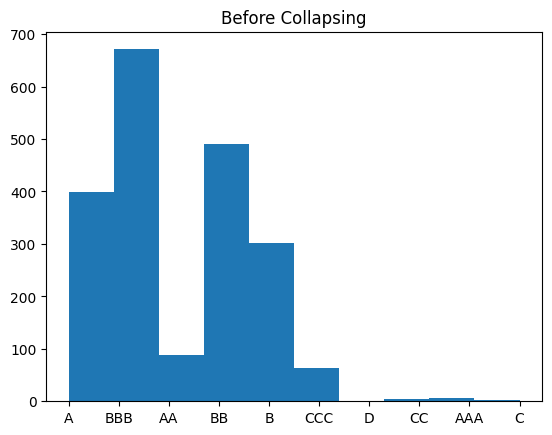

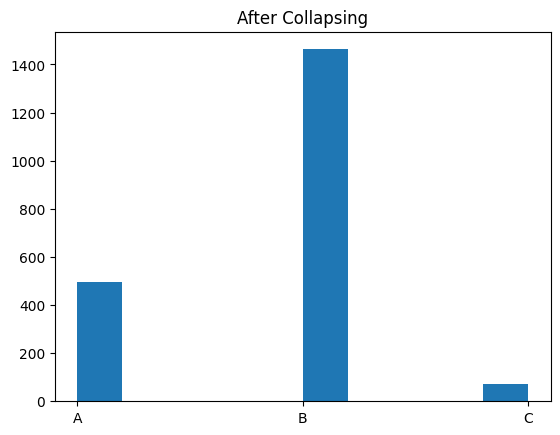

In [20]:
plt.hist(df['Rating'])
plt.title('Before Collapsing')
plt.show()

def simplify_rating(r):
    if r in ['AAA', 'AA', 'A']:
        return 'A'
    elif r in ['BBB', 'BB', 'B']:
        return 'B'
    else:
        return 'C'
df['Rating_Simple'] = df['Rating'].apply(simplify_rating)

plt.hist(df['Rating_Simple'])
plt.title('After Collapsing')
plt.show()


In [23]:
df_model = df.drop(columns=['Rating', 'Date', 'Name', 'Symbol', 'Rating Agency Name'])

df_dummies = pd.get_dummies(df_model['Sector'], drop_first=True)

X = pd.concat([df_model.drop(columns=['Sector', 'Rating_Simple']), df_dummies], axis=1)
y = df_model['Rating_Simple']

print(X.head())
print(y.value_counts())

   currentRatio  quickRatio  cashRatio  daysOfSalesOutstanding  \
0      0.945894    0.426395   0.099690               44.203245   
1      1.033559    0.498234   0.203120               38.991156   
2      0.963703    0.451505   0.122099               50.841385   
3      1.019851    0.510402   0.176116               41.161738   
4      0.957844    0.495432   0.141608               47.761126   

   netProfitMargin  pretaxProfitMargin  grossProfitMargin  \
0         0.037480            0.049351           0.176631   
1         0.044062            0.048857           0.175715   
2         0.032709            0.044334           0.170843   
3         0.020894           -0.012858           0.138059   
4         0.042861            0.053770           0.177720   

   operatingProfitMargin  returnOnAssets  returnOnCapitalEmployed  ...  \
0               0.061510        0.041189                 0.091514  ...   
1               0.066546        0.053204                 0.104800  ...   
2             

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(min_samples_leaf=10, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

tab = pd.crosstab(y_test,y_pred)
print("Confusion Matrix:\n", tab)
acc = (tab.iloc[0,0]+tab.iloc[1,1])/len(y_test)
print("Accuracy: ", str(acc))

Confusion Matrix:
 col_0           A    B  C
Rating_Simple            
A              47   49  0
B              59  227  8
C               2   11  3
Accuracy:  0.6748768472906403


The model makes predicts A not very well because most of the A's were predicted as B. The model predicts B very well because most of the B's were predicted as B. The model predicts C not very well because most of the C's were predicted as B. This means the model predicts B very well but not A and C, which means the model may be biased towards B.

In [25]:
X_with_agency = pd.concat([X, pd.get_dummies(df['Rating Agency Name'], drop_first=True)], axis=1)

X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_with_agency, y, test_size=0.2, random_state=42)

clf_agency = DecisionTreeClassifier(min_samples_leaf=10, random_state=42)
clf_agency.fit(X_train_a, y_train_a)

y_pred_a = clf_agency.predict(X_test_a)

tab = pd.crosstab(y_test_a, y_pred_a)
print("Confusion Matrix:\n", tab)
acc = (tab.iloc[0,0]+tab.iloc[1,1])/len(y_test)
print("Accuracy: ", str(acc))

Confusion Matrix:
 col_0           A    B  C
Rating_Simple            
A              54   42  0
B              34  253  7
C               0   16  0
Accuracy:  0.7561576354679803


The results do change. The accuracy gets much better, and the model predictions are better for A but still very poor for C. This means that the agency has a strong affect on the rating predictions. It could be that different agencies rate the same companies differently, so the model learns how different agencies rates companies, which improves the predictions.

**Q5.** This is a case study about detecting fraud using classification trees. The goal is to predict the `class` variable, which is 0 for non-fraud and 1 for fraud.

1. Open `./data/creditcard_fraud.csv`. Print the number of observations and variables, and look at the first few rows of data. The variables are already normalized and de-identified, and are just called things like `V8` to protect the privacy of the clients.

2. Print a table of counts for the `class` variable and make a histogram. What percentage of transactions are fraudulent?

3. Drop `Time` and make a decision tree classifier to predict fraud. Print a confusion table and compute the accuracy. This is a serious **class imbalance** problem: The minority class is so small that essentially predicting 0's for all cases will achieve an extremely high accuracy. There are over-sampling techniques to deal with this issue, but we don't have time to cover them in class.

4. Imagine that you block every transaction in the test set labelled as fraudulent. How much money is (1) saved that should be saved, (2) lost to fraud anyway, (3) withheld in error from customers? Does implementing this anti-fraud system seem like a good idea, or not? Why?

5. Instead of predicting fraud, predict loss: Multiple the `Class` variable times the `Amount` variable, and call it `Loss`. Predict it using a decision tree regressor (making sure to drop Class, Time, and Loss from the features/covariates/predictors). What $R^2$ and RMSE do you get? Make a scatterplot of the predicted values on the test group versus the actual test values. Do you notice any interesting patterns? How could you use this algorithm to decide which transactions to block, and why?


**Q6.** Show that any decision tree is equivalent to a linear regression on a set of dummy variables that represent the optimal splits in the tree.

Hint: You can think of CART as partitioning the feature space into a set of sets $\{S_1, S_2, ..., S_K\}$, and then predicting the average for all of the observations in each set $S_k$, $m_k$:
$$
\hat{y}(x) = \sum_{k=1}^K \mathbb{I}\{ x \text{ is in } S_k \} m_k
$$
where $\mathbb{I} \{ P(x,k)\}$ takes the value 1 if the proposition $P(x,k)$ is true and 0 otherwise. Now, doesn't that look like least-squares regression on a set of dummy/one-hot-encoded variables?

Conversely, can any linear regression be represented by a tree?